In [3]:
import numpy as np
from numba import jit
import pandas as pd

import pints
import pints.plot
import pints_smol_jit as toy
import matplotlib.pyplot as plt



Select the desired model, true parameters and time array.

Then simulate to get synthetic data

In [4]:

model = toy.SmolModel(None,None)


# true_parameters = [0.0004, 500]


times = np.linspace(20, 97,78)
# times = np.linspace(37, 97,61)

df = pd.read_csv('s11_inference_input_multi_well_t_20.csv', header=None)
org_values = np.transpose(df.to_numpy())

print(org_values)

print(org_values.shape)


Init 1
[[62.  61.5 42.5 ...  0.   0.   0. ]
 [56.5 60.  43.  ...  0.   0.   0. ]
 [50.5 60.  42.5 ...  0.   0.   0. ]
 ...
 [ 3.   2.5  2.  ...  0.   0.   1. ]
 [ 3.   4.   2.  ...  0.   0.   1. ]
 [ 2.   2.5  2.  ...  0.   0.   1. ]]
(78, 100)


Add noise to the data (using random sampling from normal distribution)

In [5]:

# noise = 0.25
# values = org_values *(1 + noise * np.random.normal(0, 1, org_values.shape))

# size_noise = 100
# noise_value = 25
# # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]


Set-up pints problem and log likelihoods

In [6]:

# problem = pints.MultiOutputProblem(model, times, values)
# times = np.linspace(37, 97,61)
problem = pints.MultiOutputProblem(model, times, org_values)


log_likelihood_2 = pints.GaussianIntegratedLogUniformLogLikelihood(problem)
# log_likelihood = pints.GaussianLogLikelihood(problem)

print('Original problem dimension: ' + str(problem.n_parameters()))
print('New dimension: ' + str(log_likelihood_2.n_parameters()))

# true_parameters += noise_arr
# print(true_parameters)
print(int(times[0]))



Original problem dimension: 2
New dimension: 2
20


Create uniform log prior

In [7]:

# # # Define the size of the list
# size = 102
# placeholder_lower_value = 1
# placeholder_upper_value = 50
 
# # # Create a list with the specified size filled with a placeholder value
# prior_arr_lower = [placeholder_lower_value for _ in range(size)]
# prior_arr_upper = [placeholder_upper_value for _ in range(size)]
# prior_arr_lower[0] = 0.0001
# prior_arr_upper[0] = 0.001
# prior_arr_lower[1] = 100
# prior_arr_upper[1] = 1000

log_prior = pints.UniformLogPrior(
    [0.000001, 100],
    [0.1, 5000]
    )
# log_prior = pints.UniformLogPrior(
#     prior_arr_lower,
#     prior_arr_upper
#     )

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood_2, log_prior)


/var/folders/lt/9g_w308946v4x_5mqxc951qr0000gr/T/ipykernel_27081/196718587.py:14: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  log_prior = pints.UniformLogPrior(


In [9]:

# guess_parameters = [0.0004, 500]
# size_noise = 100
# noise_value = 4
# # Create a list with the specified size filled with a placeholder value
# noise_arr = [noise_value for _ in range(size_noise)]
# guess_parameters += noise_arr
# print(guess_parameters)
# print(len(guess_parameters))

# xs = [
#     np.array(guess_parameters)*0.9,
#     np.array(guess_parameters)*1.05,
#     np.array(guess_parameters)*1.15
# ]

xs = [
    np.array([4e-04,700]),
    np.array([3.5e-04,1900]),
    np.array([3e-04,700]),
    np.array([2.5e-04,1900]),
    np.array([2e-04,700]),
    np.array([1.5e-04,1900])
]

# xs.set_max_iterations(9000)
# chains = pints.mcmc_sample(log_posterior, 3, xs)
# mcmc = pints.MCMCController(log_posterior, 6, xs)
mcmc = pints.MCMCController(log_posterior,  6, xs,method=pints.SliceDoublingMCMC)#
mcmc.set_max_iterations(5)
# mcmc.set_parallel(True)
chains = mcmc.run()
print(chains)



Using Slice Sampling - Doubling
Generating 6 chains.
Running in sequential mode.
Iter. Eval. Time m:s
0     6       0:00.0
1     288     0:00.5
2     498     0:00.8
3     626     0:00.9
4     626     0:00.9
Halting: Maximum number of iterations (4) reached.
[[[4.00000000e-04 7.00000000e+02]
  [1.04516287e-04 1.63653961e+03]
  [7.68246351e-05 1.20875992e+03]
  [1.90280633e-05 2.02166826e+03]]

 [[3.50000000e-04 1.90000000e+03]
  [3.21761745e-04 3.67807008e+02]
  [2.45717209e-04 4.53880771e+02]
  [1.51469852e-04 4.80725943e+02]]

 [[3.00000000e-04 7.00000000e+02]
  [1.26874835e-04 1.09567633e+03]
  [1.12237732e-04 2.99760509e+02]
  [1.01493979e-04 3.02318310e+02]]

 [[2.50000000e-04 1.90000000e+03]
  [3.58304886e-05 1.11327983e+03]
  [2.34807061e-05 1.28739481e+03]
  [2.31012308e-05 3.37620456e+02]]

 [[2.00000000e-04 7.00000000e+02]
  [1.14691344e-04 8.00709853e+02]
  [1.06918339e-04 4.67656593e+02]
  [4.21862952e-05 3.14507670e+02]]

 [[1.50000000e-04 1.90000000e+03]
  [9.42815526e-05 

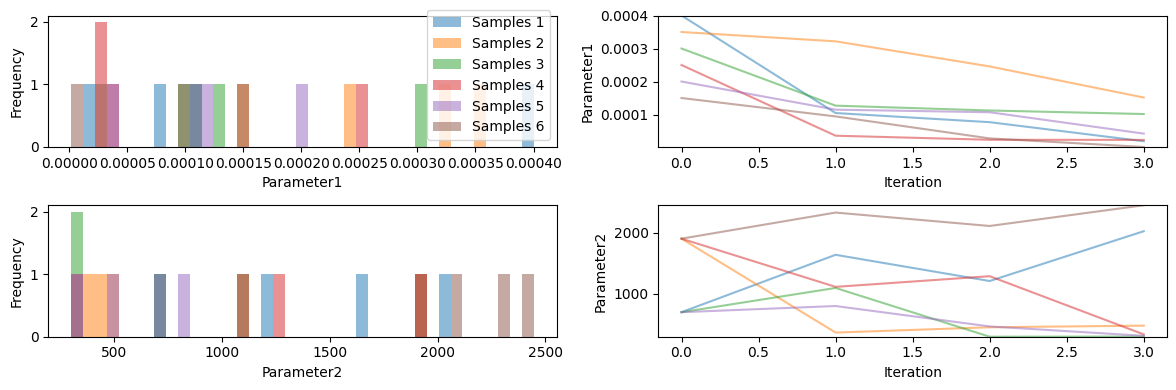

In [10]:

pints.plot.trace(chains)
plt.savefig("mcmc.png")
plt.show()